# Advanced Regression Analysis - Ames Housing Dataset

The main objective of this project is to use machine learning techniques to predict house sales prices.

Inspiration came from this [Kaggle Competition] (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview). 

Data from the [Ames Housing Dataset](http://jse.amstat.org/v19n3/decock.pdf) will be used to train and run the selected algorithms.

This project also contains feature engineering and gradient boosting. The following steps were taken:

1. Data Loading and Preliminary Inspection
2. Data Processing
3. Cross-Validation
4. Training the model (XGBRegressor)
5. Adjusting the Test set
6. Making predictions and exporting the submission file

In conclusion, the trained model achieved a [Root Mean Squared Error] (https://en.wikipedia.org/wiki/Root-mean-square_deviation) of 0.13539.

# 1. Data Loading and Preliminary Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

In [2]:
train_data = pd.read_csv('train.csv', index_col='Id')

train_data_backup = train_data.copy()

test_data = pd.read_csv('test.csv', index_col='Id')

test_data_backup = test_data.copy()

In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [8]:
test_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Train and test sets are similar. However, "Test" does not have the "price" row and the number of missing values is different.

# 2. Data Processing

In [9]:
train_data_missing_cols = train_data.columns[train_data.isna().any()]

train_data[train_data_missing_cols].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

19 columns have missing values and they must be imputed or the column (feature) be removed.

For this project, columns with >20% missing values (292 entries or more) will be removed.

First step, removing columns.

In [10]:
train_data_drop_cols = [col for col in train_data_missing_cols if train_data[col].isna().sum() > len(train_data)*0.2]

train_data_drop_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [11]:
print("Number of columns in train before: {}".format(train_data.shape[1]))

train_data.drop(train_data_drop_cols, axis=1, inplace=True)

print("Number of columns in train after: {}".format(train_data.shape[1]))

Number of columns in train before: 80
Number of columns in train after: 75


Second step, imputing new values.

In [12]:
# It's important to separate categorical from numerical columns

train_data_cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']

train_data_num_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

train_data_cat = train_data[train_data_cat_cols]

train_data_num = train_data[train_data_num_cols]

In [13]:
# Creating Imputer

cat_imputer = SimpleImputer(strategy='most_frequent')

num_imputer = SimpleImputer(strategy='mean')

# Imputing values in a new DataFrame

imputed_cat_cols = pd.DataFrame(cat_imputer.fit_transform(train_data_cat))

imputed_num_cols = pd.DataFrame(num_imputer.fit_transform(train_data_num))

# Imputation removes column names

imputed_cat_cols.columns = train_data_cat.columns

imputed_num_cols.columns = train_data_num.columns

# Concatenating columns

train_data_backup_2 = train_data.copy()

train_data = pd.concat([imputed_cat_cols, imputed_num_cols], axis=1)

# Rearranging train_data columns to match our test set

train_data = train_data[train_data_backup_2.columns]

Checking results from the imputation step

In [14]:
train_data_missing_cols_2 = train_data_backup.columns[train_data_backup.isna().any()]

train_data_backup[train_data_missing_cols_2].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [15]:
train_data_missing_cols_final = train_data.columns[train_data.isna().any()]

train_data[train_data_missing_cols_final].isna().sum().sort_values(ascending=False)

Series([], dtype: float64)

Now that the missing values problem has been solved, it is time to deal with categorical data before training the models.

In [16]:
label_encoder = LabelEncoder()

for col in train_data_cat_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

train_data.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0


As we can see above, string labels were replaced with numbers. This feature engineering process will facilitate and improve the performance of the machine learning algorithms to be used below. 

The final step for data processing is to divide train_data using train_test_split. This will alow us to have additional layers of test and validation before using the selected algorithms against the original test set (without price).

In [17]:
X = train_data.drop('SalePrice', axis=1)

y = train_data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Cross-Validation

In [18]:
def get_score(n_estimators):

    my_pipeline = Pipeline(steps=[('model', XGBRegressor(n_estimators=n_estimators, learning_rate=0.05))])

    X = train_data.drop('SalePrice', axis=1).copy()

    y = train_data['SalePrice'].copy()

    scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

    return scores.mean()

num_estimators = [i for i in range(100, 1001, 100)]

results = {}

for i in num_estimators:
    results[i] = get_score(i)

In [19]:
results

{100: 16430.006306185787,
 200: 16007.163217037672,
 300: 15964.429676797945,
 400: 15981.385870612157,
 500: 15975.116952054794,
 600: 15986.52853702911,
 700: 15991.077793236302,
 800: 15989.582090111304,
 900: 15990.234281357023,
 1000: 15992.153296232875}

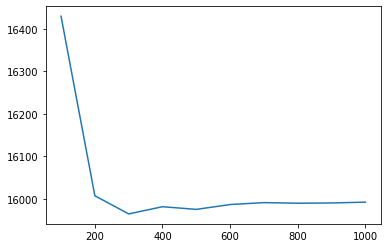

In [20]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

300 estimators seems to yield the lowest error and will be the used paramenter in the final model.

# 4. Training the model

In [21]:
X = train_data.drop('SalePrice', axis=1).copy()

y = train_data['SalePrice'].copy()

model = XGBRegressor(n_estimators=300, learning_rate=0.05, n_jobs=4)

model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# 5. Adjusting the Test set

Now it is time to repeat on the Test set all data processing steps used in the Train set.

In [22]:
# Removing columns with a high number of missing values

test_data.drop(train_data_drop_cols, axis=1, inplace=True)

test_data.shape

(1459, 74)

In [23]:
# Dividing categorical and numerical data

test_data_cat_cols = [col for col in test_data.columns if test_data[col].dtype == 'object']

test_data_num_cols = [col for col in test_data.columns if test_data[col].dtype in ['int64', 'float64']]

test_data_cat = test_data[test_data_cat_cols]

test_data_num = test_data[test_data_num_cols]

In [24]:
# Creating Imputers

cat_imputer = SimpleImputer(strategy='most_frequent')

num_imputer = SimpleImputer(strategy='mean')

# Imputing values into a new DataFrame

imputed_cat_cols = pd.DataFrame(cat_imputer.fit_transform(test_data_cat))

imputed_num_cols = pd.DataFrame(cat_imputer.fit_transform(test_data_num))

# Imputation removes column names

imputed_cat_cols.columns = test_data_cat.columns

imputed_num_cols.columns = test_data_num.columns

# Concatenating columns

test_data_backup_2 = test_data.copy()

test_data = pd.concat([imputed_cat_cols, imputed_num_cols], axis=1)

# Rearranging train_data columns to match the Train set

test_data = test_data[test_data_backup_2.columns]

# Checking results

test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,RH,80.0,11622.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal
1,20.0,RL,81.0,14267.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal
2,60.0,RL,74.0,13830.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal
3,60.0,RL,78.0,9978.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,WD,Normal
4,120.0,RL,43.0,5005.0,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,WD,Normal


In [25]:
# Encoding categorical variables

test_data_cat_cols = [col for col in test_data if test_data[col].dtype == 'object']

label_encoder = LabelEncoder()

for col in test_data[test_data_cat_cols]:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Checking results

test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20.0,2,80.0,11622.0,1,3,3,0,4,0,...,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,8,4
1,20.0,3,81.0,14267.0,1,0,3,0,0,0,...,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,8,4
2,60.0,3,74.0,13830.0,1,0,3,0,4,0,...,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,8,4
3,60.0,3,78.0,9978.0,1,0,3,0,4,0,...,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0,8,4
4,120.0,3,43.0,5005.0,1,0,1,0,4,0,...,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0,8,4


# 6. Making predictions and exporting the submission file

In [26]:
final_prediction = model.predict(test_data).astype(float)

final_prediction

array([121852.078125, 156787.265625, 183595.75    , ..., 159442.09375 ,
       113241.390625, 219823.28125 ])

In [27]:
final_data = pd.DataFrame({'SalePrice':final_prediction})

final_data['Id'] = [i for i in range(1461, 2920)]

final_data = final_data[['Id', 'SalePrice']]

final_data.reset_index(inplace=True)

final_data.drop('index', axis=1, inplace=True)

final_data.head()

,Id,SalePrice
0,1461,121852.078125
1,1462,156787.265625
2,1463,183595.750000
3,1464,186760.203125
4,1465,188337.093750


Calculated Mean Squared Root Error is 0.13539

In [28]:
final_data.to_csv('submissions.csv', index=False)